<a href="https://colab.research.google.com/github/Shubhanker01/ai-course/blob/main/earthquake_tsunami_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing kaggle dataset
!pip install kagglehub[pandas-datasets]

In [11]:
# import kagglehub and datasetadapter
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
path = kagglehub.dataset_download("ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'global-earthquake-tsunami-risk-assessment-dataset' dataset.
Path to dataset files: /kaggle/input/global-earthquake-tsunami-risk-assessment-dataset


In [12]:
file_path = '/earthquake_data_tsunami.csv'
# Load the latest version
earthquake = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset",file_path)

Using Colab cache for faster access to the 'global-earthquake-tsunami-risk-assessment-dataset' dataset.


In [14]:
# show as dataframe
df = pd.DataFrame(earthquake)
df.head(5)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>,
        <Axes: title={'center': 'sig'}>],
       [<Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'tsunami'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

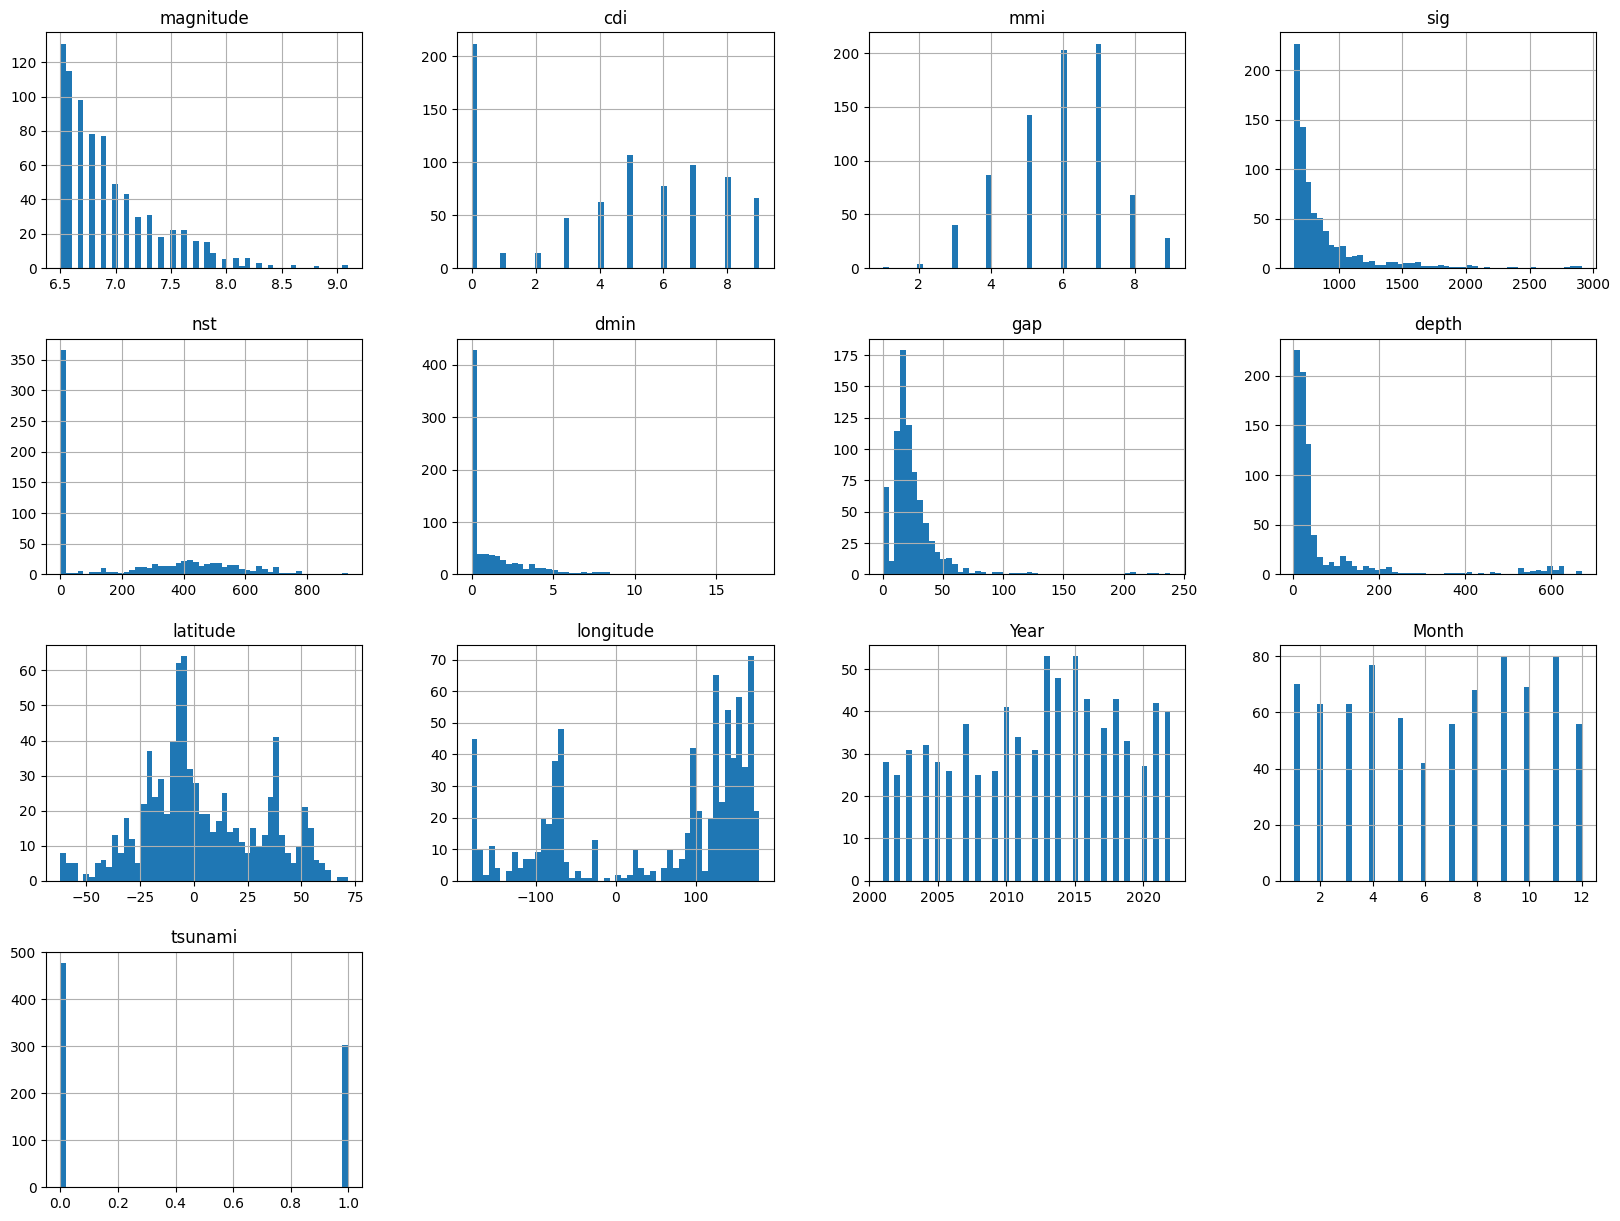

In [15]:
# generate histogram
df.hist(bins=50, figsize=(20,15))

In [16]:
# data analysis
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [28]:
# encode all the features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# 1️⃣ Drop the target column
x = df.drop('tsunami', axis=1)
x = df.drop('tsunami_encoded',axis=1)
y = df['tsunami']
for col in x.columns:
    if x.columns.dtype == 'object':
        x[col] = le.fit_transform(x[col])

x.head(5)


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,...,mmi_encoded,sig_encoded,nst_encoded,dmin_encoded,gap_encoded,depth_encoded,latitude_encoded,longitude_encoded,Year_encoded,Month_encoded
0,5,8,6,94,18,40,55,32,249,656,...,6,94,18,40,55,32,249,656,21,10
1,4,4,3,69,15,195,168,76,347,366,...,3,69,15,195,168,76,347,366,21,10
2,5,3,2,84,28,248,62,280,136,9,...,2,84,28,248,62,280,136,9,21,10
3,8,5,4,132,29,176,87,111,148,45,...,4,132,29,176,87,111,148,45,21,10
4,1,0,1,14,20,316,130,296,90,767,...,1,14,20,316,130,296,90,767,21,10


In [29]:
# model selection and test train and split data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# classification
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)

(625, 25)
(157, 25)
(625,)
(157,)
Accuracy:  1.0
